In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt

In [224]:
recipes = pd.read_csv("/Users/vincentsalamand/Downloads/recipe_2019-03-05_14h21m53.csv")
foods = pd.read_csv("/Users/vincentsalamand/Downloads/food_2019-03-05_11h03m15.csv")
items = pd.read_csv("/Users/vincentsalamand/Downloads/item_2019-03-05_11h04m18.csv")

items = items.rename(columns={ items.columns[2]: "FoodName", items.columns[3]: "IdRecipe" })

dataset = pd.merge(foods, items, left_on = 'Name', right_on = 'FoodName')
dataset = pd.merge(recipes, dataset, left_on = 'Id', right_on = 'IdRecipe')
dataset = dataset.drop(["Id_y", "Recipe ingredient", "FoodName", "IdRecipe"], axis=1)

dataset = dataset.rename(columns={ "Name [Category]": "Category", "Parent [Category]": "ParentCategory" })
foods = foods.rename(columns={ "Name [Category]": "Category", "Parent [Category]": "ParentCategory" })
dataset = dataset[dataset.Status.str.contains("published")]

foods.describe()

,Name,Availability,Tag list,Parent,Category,Rating [Category],ParentCategory
count,536,536,536,536,535,535,535
unique,536,54,1,38,34,4,12
top,mûre,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",-,-,Légumes,good,Fruits et légumes
freq,1,413,536,379,81,229,169


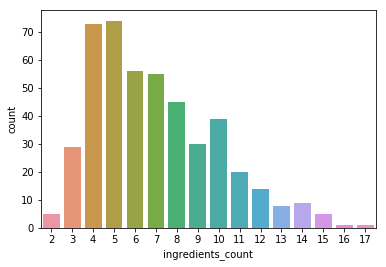

In [171]:
recipes["ingredients_count"]= recipes.Title.map(dataset.Title.value_counts())

sns.countplot(recipes.ingredients_count)

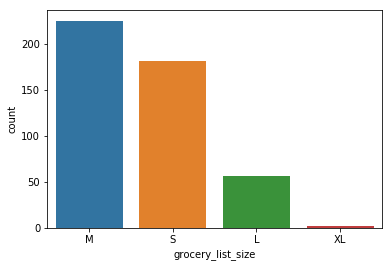

In [172]:
recipes["grocery_list_size"] = recipes.ingredients_count.apply(lambda x: "XL" if x > 15 
                                             else "L" if x > 10  
                                             else "M" if x > 5 
                                             else "S")

recipes.groupby("grocery_list_size").Title.count() 
#sns.catplot(x="grocery_list_size", y="ingredients_count", kind="bar", data=recipes)
sns.countplot(recipes.grocery_list_size)

In [289]:
top_foods = dataset.Name.value_counts()
top_foods

huile d'olive                  228
ail                            183
graine de sésame               136
tomate                          96
moutarde                        92
oignon                          91
persil                          90
vinaigre balsamique             84
avocat                          84
salade                          67
riz                             63
carotte                         60
oeuf                            58
pomme de terre                  57
pâtes                           52
brocoli                         50
crème fraîche                   48
basilic                         48
citron                          48
blanc de poulet                 47
mozzarella                      44
échalote                        43
champignon                      41
quinoa                          38
parmesan                        36
thym                            36
petit pois                      34
cumin                           34
jambon blanc        

In [225]:
foods.ParentCategory.value_counts()

Fruits et légumes                                      169
Viandes et charcuteries, produits de la pêche, oeufs    117
Féculents                                               71
Matières grasses ajoutées                              68
Lait et produits laitiers                                40
Herbes ou épices                                         37
Légumineuses                                            16
Produits sucrés ou sucrés et gras                       6
 -                                                        4
Sel                                                       4
Boissons sucrées                                         2
Eau                                                       1
Name: ParentCategory, dtype: int64

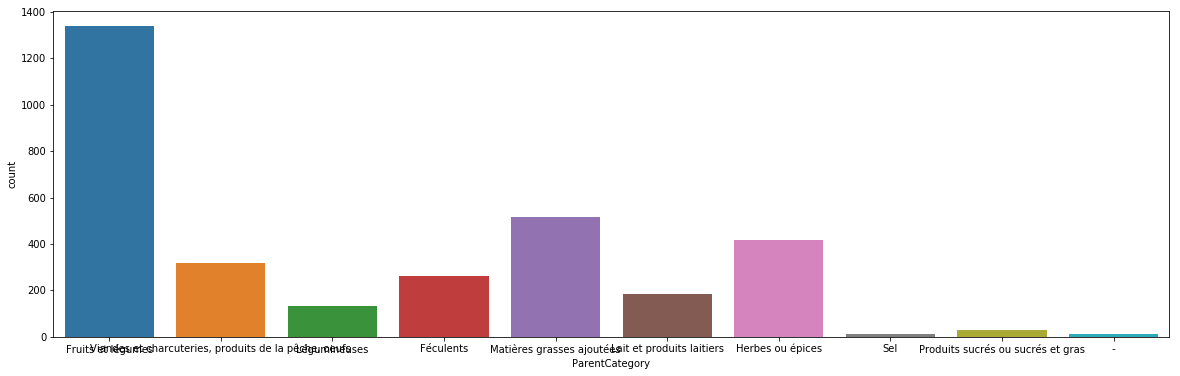

In [204]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20, 6))
sns.countplot(dataset.ParentCategory, ax=ax)
plt.show()

In [300]:
dataset.groupby("ParentCategory").Name.value_counts()

ParentCategory                                        Name                       
 -                                                    vin rouge                        6
                                                      vin blanc                        5
Féculents                                            riz                             63
                                                      pâtes                           52
                                                      quinoa                          38
                                                      pâte à pizza                    29
                                                      riz basmati                     27
                                                      pain                            17
                                                      semoule                         10
                                                      pain hamburger                   7
                            

In [5]:
animal_categories = ["Volaille", "Charcuterie", "Viande hors volaille"]
fish_categories = ["Poissons gras", "Autres poissons, mollusques et crustacés"]
animal_based_categories = animal_categories + fish_categories + ["Fromages", "Produits laitiers frais nature" + "Beurre et beurres allégés"]

  
animal_foods = foods[foods['Category'].isin(animal_categories)]
fish_foods = foods[foods['Category'].isin(fish_categories)]
animal_based_foods = foods[foods['Category'].isin(animal_based_categories)]

veggie_foods = pd.concat([foods, animal_foods, fish_foods]).drop_duplicates(keep=False)
vegan_foods = pd.concat([foods, animal_based_foods]).drop_duplicates(keep=False)



In [496]:
foods["is_veggie"] = foods.Category.apply(lambda x: 0 if x in animal_categories
                                             else 1)
foods["is_vegan"] = foods.Category.apply(lambda x: 0 if x in animal_based_categories
                                             else 1)

foods.head()

,Name,Availability,Tag list,Parent,Category,Rating [Category],Parent [Category],is_veggie,is_vegan
0,huile d'olive,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",-,-,Huiles végétales pauvres en ALA et margarines,-,Matières grasses ajoutées,1,1
1,steak haché,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",-,boeuf,Viande hors volaille,limit,"Viandes et charcuteries, produits de la pêche,...",0,0
2,pâtes,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",-,-,Autres féculents complets,good,Féculents,1,1
3,semoule,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",-,-,Autres féculents raffinés,limit,Féculents,1,1
4,tomate,"05, 06, 07, 08, 09",-,-,Légumes,good,Fruits et légumes,1,1


In [217]:
recipes = pd.read_csv("/Users/vincentsalamand/Downloads/recipe_2019-03-05_14h21m53.csv")
foods = pd.read_csv("/Users/vincentsalamand/Downloads/food_2019-03-05_11h03m15.csv")
items = pd.read_csv("/Users/vincentsalamand/Downloads/item_2019-03-05_11h04m18.csv")

recipes = recipes[recipes.Status.str.contains("published")]

items = items.rename(columns={ items.columns[2]: "FoodName", items.columns[3]: "IdRecipe" })
foods = foods.rename(columns={ "Name [Category]": "Category" })

foods["not_veggie"] = foods.Category.apply(lambda x: 1 if x in animal_categories
                                             else 0)
foods["not_vegan"] = foods.Category.apply(lambda x: 1 if x in animal_based_categories
                                             else 0)

dataset = pd.merge(foods, items, left_on = 'Name', right_on = 'FoodName')
dataset = pd.merge(recipes, dataset, left_on = 'Id', right_on = 'IdRecipe')
dataset = dataset.drop(["Id_y", "Recipe ingredient", "FoodName", "IdRecipe"], axis=1)

dataset = dataset.rename(columns={ "Name [Category]": "Category", "Parent [Category]": "ParentCategory" })
dataset = dataset[dataset.Status.str.contains("published")]


In [219]:
diets = dataset.groupby("Title").sum()
diets.mean()

Id_x          6395.172414
not_veggie       0.413793
not_vegan        0.816810
dtype: float64

In [220]:
recipes["is_veggie"] = 0
recipes["is_vegan"] = 0

for i in range(len(diets)):
    index = recipes[recipes.Title == diets.iloc[i].name].index.values.astype(int)[0]
    if diets.iloc[i].not_veggie == 0:
        recipes.at[index, 'is_veggie'] = 1 
    if diets.iloc[i].not_vegan == 0:
        recipes.at[index, 'is_vegan'] = 1 

veggie_recipes = recipes[recipes.is_veggie == 1]
vegan_recipes = recipes[recipes.is_vegan == 1]

recipes.head()

,Id,Title,Ingredients,Instructions,Status,Rating,is_veggie,is_vegan
654,657,"Saumon grillé, riz basmati, brocoli, asperge, ...",brocoli\r\nasperge\r\ngraine de sésame\r\nriz ...,<strong>Saumon grillé:</strong> Faire chauffer...,published,limit,1,0
655,658,"Saumon grillé, pâtes, haricots verts, graines ...",haricot vert\r\ngraine de sésame\r\npâtes\r\np...,<strong>Saumon grillé:</strong> Faire chauffer...,published,good,1,0
656,659,"Saumon grillé, quinoa, asperge",asperge\r\nquinoa\r\npavé de saumon,<strong>Saumon grillé:</strong> Faire chauffer...,published,limit,1,0
657,660,"Poulet grillé, quinoa, asperge",asperge\r\nquinoa\r\nblanc de poulet,<strong>Poulet grillé:</strong> Faire chauffer...,published,limit,0,0
658,661,"Oeufs brouillés, avocat, salade verte, vinaigr...",avocat\r\nsalade\r\ngraine de sésame\r\noeuf\r...,<strong>Oeufs brouillés:</strong> Mélanger les...,published,good,1,1


In [221]:
recipes.mean()

Id           901.366379
is_veggie      0.601293
is_vegan       0.351293
dtype: float64

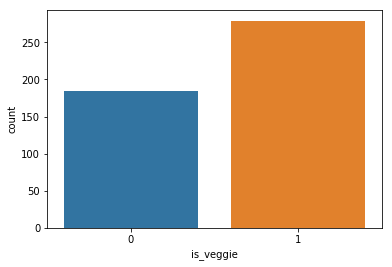

In [162]:
sns.countplot(recipes.is_veggie)

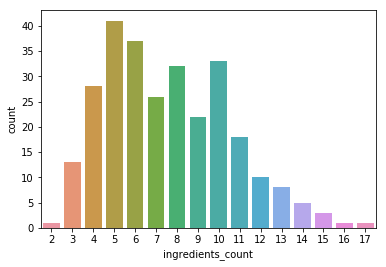

In [173]:
veggie_recipes["ingredients_count"]= veggie_recipes.Title.map(dataset.Title.value_counts())

sns.countplot(veggie_recipes.ingredients_count)

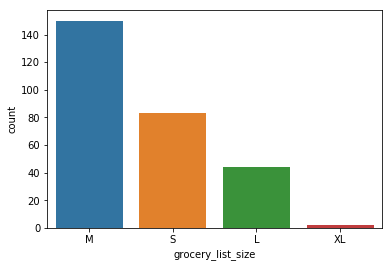

In [174]:
veggie_recipes["grocery_list_size"] = veggie_recipes.ingredients_count.apply(lambda x: "XL" if x > 15 
                                             else "L" if x > 10  
                                             else "M" if x > 5 
                                             else "S")

veggie_recipes.groupby("grocery_list_size").Title.count() 
sns.countplot(veggie_recipes.grocery_list_size)

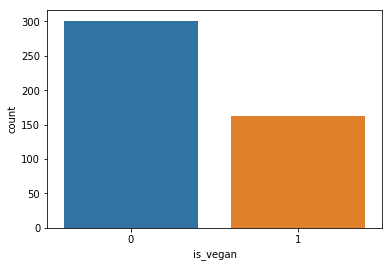

In [163]:
sns.countplot(recipes.is_vegan)

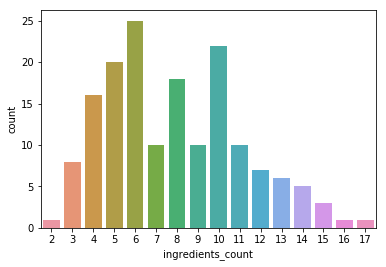

In [178]:
vegan_recipes["ingredients_count"]= vegan_recipes.Title.map(dataset.Title.value_counts())

sns.countplot(vegan_recipes.ingredients_count)

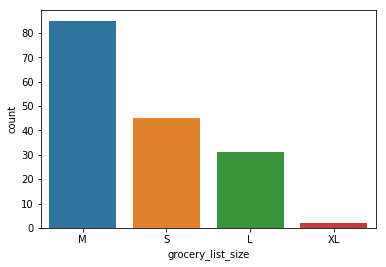

In [181]:
vegan_recipes["grocery_list_size"] = vegan_recipes.ingredients_count.apply(lambda x: "XL" if x > 15 
                                             else "L" if x > 10  
                                             else "M" if x > 5 
                                             else "S")

vegan_recipes.groupby("grocery_list_size").Title.count() 
sns.countplot(vegan_recipes.grocery_list_size)

In [201]:
top_vegan_foods = dataset[dataset.Name.isin(vegan_foods.Name)].Name.value_counts()
top_vegan_foods



huile d'olive          228
ail                    183
graine de sésame       136
tomate                  96
moutarde                92
oignon                  91
persil                  90
vinaigre balsamique     84
avocat                  84
salade                  67
riz                     63
carotte                 60
oeuf                    58
pomme de terre          57
pâtes                   52
brocoli                 50
basilic                 48
crème fraîche           48
citron                  48
échalote                43
champignon              41
quinoa                  38
thym                    36
cumin                   34
petit pois              34
romarin                 31
paprika                 31
lentille                30
curcuma                 30
herbes de provence      30
                      ... 
betterave                3
yaourt nature            2
pain de mie              2
navet                    2
mayonnaise               2
aneth                    2
b